In [ ]:
!pip install keras


# Animal Classification using CIFAR-10 Dataset
In this project, we will develop a Convolutional Neural Network (CNN) to classify images of animals from the CIFAR-10 dataset...


In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.utils import plot_model
import random

## 1. Data Loading and Preprocessing
We begin by loading the CIFAR-10 dataset and then filter out non-animal classes...


## Loading CIFAR-10 dataset from tensorflow

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split the training set for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Exploratory Data Analysis (EDA)
In this section, we perform basic EDA to understand our dataset better. We will visualize some images from the CIFAR-10 dataset and analyze the distribution of the animal classes.


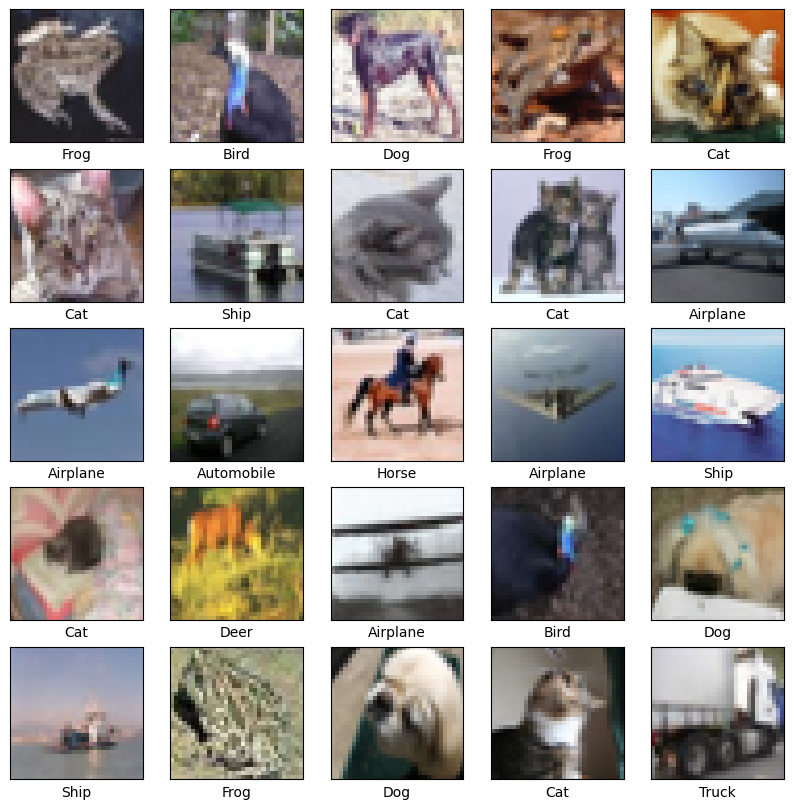

In [14]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    label_index = y_train[i][0]
    plt.xlabel(class_names[label_index])
plt.show()

## Model Architecture
Here we describe the CNN architecture used for this project. The model consists of convolutional layers, max pooling layers, a flattening layer, and dense layers. Each type of layer has a specific role in the model.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


conv2d - Activation Function: relu
max_pooling2d
conv2d_1 - Activation Function: relu
max_pooling2d_1
flatten
dense - Activation Function: relu
dense_1 - Activation Function: softmax


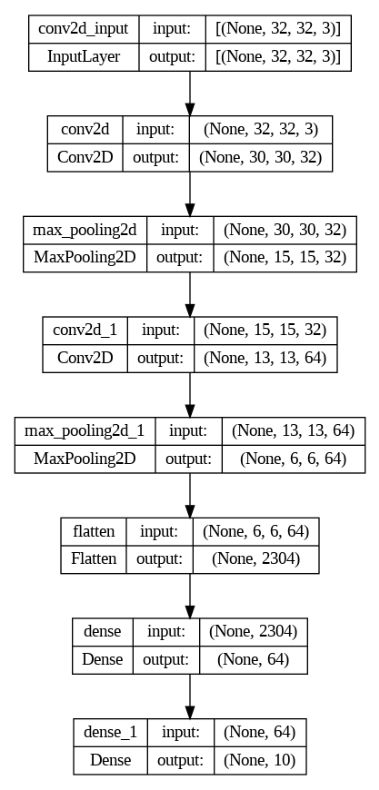

In [16]:
# Function to get the names of activation functions for each layer
def get_activation_function(layer):
    if hasattr(layer, 'activation') and layer.activation is not None:
        return layer.activation.__name__
    else:
        return None

# Visualize the model architecture with activation functions
plot_model(
    model,
    to_file='model_architecture_with_activations.png',
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)

# Extract layers and activation functions
layers = [layer for layer in model.layers]
activation_functions = [get_activation_function(layer) for layer in layers]

# Display layers and corresponding activation functions
for layer, activation_function in zip(layers, activation_functions):
    if activation_function:
        print(f"{layer.name} - Activation Function: {activation_function}")
    else:
        print(layer.name)

img = plt.imread('model_architecture_with_activations.png')
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()



In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Training the Model
Now, we proceed to train the model. We will discuss the chosen parameters like the number of epochs, batch size, and our choices for the optimizer and loss function.


In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 9s 4ms/step - loss: 1.5272 - accuracy: 0.4487 - val_loss: 1.2506 - val_accuracy: 0.5583
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1767 - accuracy: 0.5870 - val_loss: 1.1213 - val_accuracy: 0.6066
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0333 - accuracy: 0.6407 - val_loss: 1.0163 - val_accuracy: 0.6465
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9477 - accuracy: 0.6707 - val_loss: 0.9942 - val_accuracy: 0.6551
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8865 - accuracy: 0.6916 - val_loss: 0.9579 - val_accuracy: 0.6663
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8297 - accuracy: 0.7104 - val_loss: 0.9394 - val_accuracy: 0.6758
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7773 - accuracy: 0.7285 - val_loss: 0.9033 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9203 - accuracy: 0.6915 - 659ms/epoch - 2ms/step

Test accuracy: 0.6915000081062317


## Evaluation and Analysis
After training the model, we evaluate its performance. We will look at the accuracy and loss plots for both training and validation sets and discuss the model's performance.


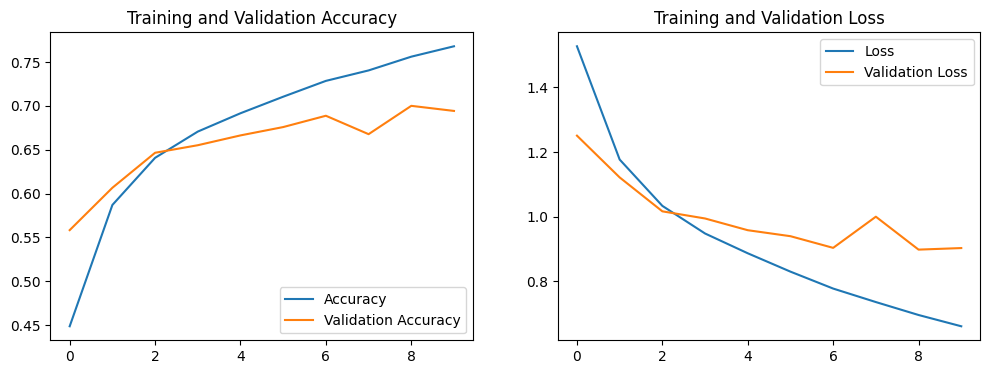

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Predictions by Model

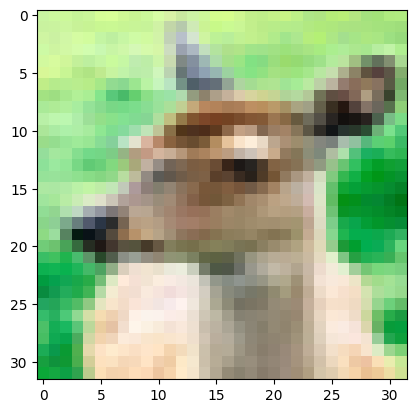

1/1 [==============================] - 0s 17ms/step
Model's prediction: Deer (Class index: 4)


In [38]:
# Select an image
index = random.randint(0, 10000)
image_to_predict = x_test[index]

# Display the image
plt.imshow(image_to_predict)
plt.show()

# Preprocess the image (if your model requires any specific preprocessing, apply it here)
image_to_predict = np.expand_dims(image_to_predict, axis=0)  # Model expects a batch of images

# Make a prediction
predictions = model.predict(image_to_predict)
predicted_class = np.argmax(predictions, axis=1)

# Retrieve the class name
class_name = class_names[predicted_class[0]]

print(f"Model's prediction: {class_name} (Class index: {predicted_class[0]})")

## Conclusion
To conclude, we summarize the outcomes of our Image classification project using the CIFAR-10 dataset. We reflect on what was learned, the performance of the model, and discuss potential improvements for future experiments.
